La phase de nettoyage du jeu de données inclut la vérification de l'absence de valeurs manquantes pour chaque feature, la standardisation des features numériques, et l'encodage one-hot des variables catégorielles.

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
import io #permet de lire le fichier directement en mémoire
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

df.head()


df.info()


df.describe()

Saving stress_detection_data[1].csv to stress_detection_data[1].csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  773 non-null    int64  
 1   Gender               773 non-null    object 
 2   Occupation           773 non-null    object 
 3   Marital_Status       773 non-null    object 
 4   Sleep_Duration       773 non-null    float64
 5   Sleep_Quality        773 non-null    float64
 6   Wake_Up_Time         773 non-null    object 
 7   Bed_Time             773 non-null    object 
 8   Physical_Activity    773 non-null    float64
 9   Screen_Time          773 non-null    float64
 10  Caffeine_Intake      773 non-null    int64  
 11  Alcohol_Intake       773 non-null    int64  
 12  Smoking_Habit        773 non-null    object 
 13  Work_Hours           773 non-null    int64  
 14  Travel_Time          7

,Age,Sleep_Duration,Sleep_Quality,Physical_Activity,Screen_Time,Caffeine_Intake,Alcohol_Intake,Work_Hours,Travel_Time,Social_Interactions,Blood_Pressure,Cholesterol_Level,Blood_Sugar_Level
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,38.887451,6.338422,3.848124,2.979301,4.105433,1.818887,0.888745,8.258732,2.858344,3.196636,137.943079,220.834411,111.765847
std,7.686642,0.733584,0.545459,0.797234,0.812513,0.838396,0.673741,1.064168,1.083758,0.856332,13.122060,19.322622,12.533097
min,18.000000,3.500000,2.000000,1.000000,2.000000,0.000000,0.000000,6.000000,0.500000,1.000000,110.000000,150.000000,80.000000
25%,33.000000,6.000000,3.600000,2.000000,4.000000,1.000000,0.000000,8.000000,2.000000,3.000000,130.000000,210.000000,105.000000
50%,39.000000,6.300000,3.900000,3.000000,4.000000,2.000000,1.000000,8.000000,3.000000,3.000000,140.000000,220.000000,115.000000
75%,45.000000,7.000000,4.000000,4.000000,5.000000,2.000000,1.000000,9.000000,4.000000,4.000000,150.000000,230.000000,120.000000
max,60.000000,8.000000,5.000000,5.000000,8.000000,4.000000,2.000000,14.000000,5.000000,5.000000,170.000000,290.000000,150.000000


In [ ]:

df.isnull().sum()


(df.isnull().sum() / len(df)) * 100

,0
Age,0.0
Gender,0.0
Occupation,0.0
Marital_Status,0.0
Sleep_Duration,0.0
Sleep_Quality,0.0
Wake_Up_Time,0.0
Bed_Time,0.0
Physical_Activity,0.0
Screen_Time,0.0


In [ ]:
df["Stress_Detection"].value_counts(normalize=True) * 100

,proportion
Stress_Detection,
Medium,40.103493
High,38.939198
Low,20.957309


In [ ]:
from sklearn.utils import resample

df_low = df[df["Stress_Detection"] == "Low"]
df_med = df[df["Stress_Detection"] == "Medium"]
df_high = df[df["Stress_Detection"] == "High"]

df_med_down = resample(df_med, replace=False, n_samples=len(df_low))
df_high_down = resample(df_high, replace=False, n_samples=len(df_low))

df_balanced = pd.concat([df_low, df_med_down, df_high_down])
print(df_balanced)

     Age  Gender             Occupation Marital_Status  Sleep_Duration  \
0     30    Male      Software Engineer         Single             7.0   
3     35    Male      Software Engineer         Single             7.0   
4     29  Female                Teacher         Single             8.0   
11    28  Female     Research Assistant         Single             7.0   
13    34  Female                Teacher        Married             8.0   
..   ...     ...                    ...            ...             ...   
262   45    Male  Electrical Technician         Single             7.0   
327   37  Female           Psychologist        Married             6.2   
5     45    Male                 Doctor        Married             6.0   
15    50  Female              Physician       Divorced             6.5   
745   36    Male      Software Engineer        Married             6.3   

     Sleep_Quality Wake_Up_Time  Bed_Time  Physical_Activity  Screen_Time  \
0              4.0      7:00 AM  1

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


df = pd.read_csv('stress_detection_data.csv')


cat_cols = ['Gender', 'Occupation', 'Marital_Status',
            'Smoking_Habit', 'Meditation_Practice', 'Exercise_Type']


for col in cat_cols:
    df[f'{col}_original'] = df[col]


ohe = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')


encoded_data = ohe.fit_transform(df[cat_cols])


encoded_cols = ohe.get_feature_names_out(cat_cols)


df_encoded = pd.DataFrame(encoded_data, columns=encoded_cols, index=df.index)


df = df.drop(columns=cat_cols)
df = pd.concat([df, df_encoded], axis=1)


print(df[[f'{col}_original' for col in cat_cols] + list(encoded_cols)].head(5))


df.to_csv('stress_detection_data_encoded.csv', index=False)

  Gender_original Occupation_original Marital_Status_original  \
0            Male   Software Engineer                  Single   
1          Female   Marketing Manager                 Married   
2            Male      Data Scientist                Divorced   
3            Male   Software Engineer                  Single   
4          Female             Teacher                  Single   

  Smoking_Habit_original Meditation_Practice_original Exercise_Type_original  \
0                     No                          Yes                 Cardio   
1                     No                           No                   Yoga   
2                     No                          Yes      Strength Training   
3                     No                          Yes                 Cardio   
4                     No                          Yes                   Yoga   

   Gender_Female  Gender_Male  Occupation_Account Manager  \
0            0.0          1.0                         0.0   
1     

In [ ]:
def time_to_minutes(t):
    import datetime
    if pd.isnull(t):
        return np.nan
    try:
        x = pd.to_datetime(t)
        return x.hour*60 + x.minute
    except:
        return np.nan

df['Wake_Up_Time_original'] = df['Wake_Up_Time']
df['Wake_Up_Time'] = df['Wake_Up_Time'].apply(time_to_minutes)
print(df[['Wake_Up_Time_original','Wake_Up_Time']].head(5))

df.to_csv('stress_detection_data_encoded.csv', index=False)

  Wake_Up_Time_original  Wake_Up_Time
0               7:00 AM           420
1               6:00 AM           360
2               7:00 AM           420
3               7:00 AM           420
4               6:30 AM           390


In [ ]:
def time_to_minutes(t):
    import datetime
    if pd.isnull(t):
        return np.nan
    try:
        x = pd.to_datetime(t)
        return x.hour*60 + x.minute
    except:
        return np.nan


df['Bed_Time_original'] = df['Bed_Time']
df['Bed_Time'] = df['Bed_Time'].apply(time_to_minutes)

print(df[['Bed_Time_original','Bed_Time']].head(5))
df.to_csv('stress_detection_data_encoded.csv', index=False)

  Bed_Time_original  Bed_Time
0          10:00 PM      1320
1          11:00 PM      1380
2          10:00 PM      1320
3          10:00 PM      1320
4          10:30 PM      1350


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['Sleep_Duration', 'Sleep_Quality', 'Physical_Activity',
                'Screen_Time', 'Caffeine_Intake', 'Alcohol_Intake',
                'Work_Hours', 'Travel_Time', 'Social_Interactions',
                'Blood_Sugar_Level', 'Cholesterol_Level']

for col in numeric_cols:
    df[f'{col}_original'] = df[col]
    df[col] = scaler.fit_transform(df[[col]])
df.to_csv('stress_detection_data_encoded.csv', index=False)

In [ ]:
import pandas as pd


df = pd.read_csv("stress_detection_data_encoded.csv")


df['Stress_Detection_original'] = df['Stress_Detection']


print("Valeurs uniques avant transformation :", df['Stress_Detection'].unique())

mapping = {'Low': 1, 'Medium': 2, 'High': 3}


df['Stress_Detection'] = df['Stress_Detection'].map(mapping)


print("Valeurs uniques après transformation :", df['Stress_Detection'].unique())

print(df.head())


df.to_csv("stress_detection_data_encoded.csv", index=False)
print("\nLe fichier encodé a été enregistré sous le nom : stress_detection_data_encoded.csv")

Valeurs uniques avant transformation : ['Low' 'Medium' 'High']
Valeurs uniques après transformation : [1 2 3]
   Age  Sleep_Duration  Sleep_Quality  Wake_Up_Time  Bed_Time  \
0   30        0.902427       0.278617           420      1320   
1   35       -0.461625      -1.555888           360      1380   
2   40        0.902427       0.278617           420      1320   
3   35        0.902427       0.278617           420      1320   
4   29        2.266479       2.113122           390      1350   

   Physical_Activity  Screen_Time  Caffeine_Intake  Alcohol_Intake  \
0           -1.22917    -0.129846        -0.977364       -1.319973   
1           -2.48432    -1.361392        -2.170891        0.165237   
2           -1.22917    -0.129846        -0.977364       -1.319973   
3           -1.22917    -0.129846        -0.977364       -1.319973   
4            0.02598    -2.592938        -0.977364       -1.319973   

   Work_Hours  ...  Physical_Activity_original  Screen_Time_original  \
0   -0

In [ ]:
df=pd.read_csv("stress_detection_data_encoded.csv")
df = df[[col for col in df.columns if not col.endswith("_original")]]
[col for col in df.columns if col.endswith("_original")]
df.head(20)



,Age,Sleep_Duration,Sleep_Quality,Wake_Up_Time,Bed_Time,Physical_Activity,Screen_Time,Caffeine_Intake,Alcohol_Intake,Work_Hours,...,Smoking_Habit_Yes,Meditation_Practice_No,Meditation_Practice_Yes,Exercise_Type_Aerobics,Exercise_Type_Cardio,Exercise_Type_Meditation,Exercise_Type_Pilates,Exercise_Type_Strength Training,Exercise_Type_Walking,Exercise_Type_Yoga
0,30,0.902427,0.278617,420,1320,-1.229170,-0.129846,-0.977364,-1.319973,-0.243288,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35,-0.461625,-1.555888,360,1380,-2.484320,-1.361392,-2.170891,0.165237,0.697021,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,40,0.902427,0.278617,420,1320,-1.229170,-0.129846,-0.977364,-1.319973,-0.243288,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,35,0.902427,0.278617,420,1320,-1.229170,-0.129846,-0.977364,-1.319973,-0.243288,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,29,2.266479,2.113122,390,1350,0.025980,-2.592938,-0.977364,-1.319973,-1.183598,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,45,-0.461625,-1.555888,330,1380,-1.229170,-0.129846,0.216163,0.165237,1.637331,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,32,0.902427,0.278617,420,0,-2.484320,2.333246,1.409689,-1.319973,0.697021,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,37,1.584453,0.278617,360,1350,-0.601595,-0.745619,0.216163,-1.319973,-0.243288,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,50,-1.143651,-3.390393,300,30,-1.229170,4.796338,1.409689,1.650447,3.517951,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,40,-0.461625,-1.555888,360,1410,0.025980,0.485927,0.216163,-1.319973,0.697021,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Partie de visualisation des données :Visualisation des lignes du dataset selon Stress_Detection (variable cible), boîtes à moustaches, diagramme de répartition du niveau de stress et matrice de corrélation entre variables.

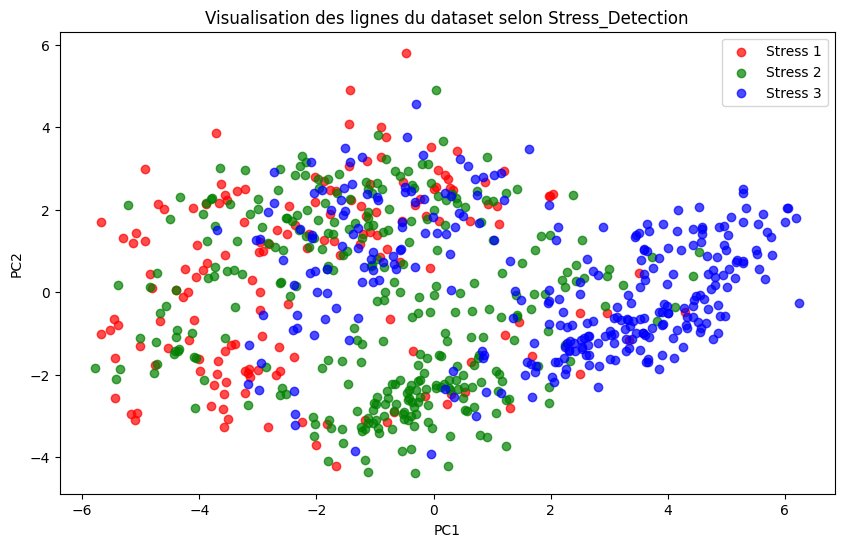

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop("Stress_Detection", axis=1)
y = df["Stress_Detection"]

X = pd.get_dummies(X)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(10,6))
colors = {1: 'red', 2: 'green', 3: 'blue'}

for classe in y.unique():
    plt.scatter(
        X_pca[y==classe, 0],
        X_pca[y==classe, 1],
        c=colors[classe],
        label=f'Stress {classe}',
        alpha=0.7
    )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualisation des lignes du dataset selon Stress_Detection')
plt.legend()
plt.show()

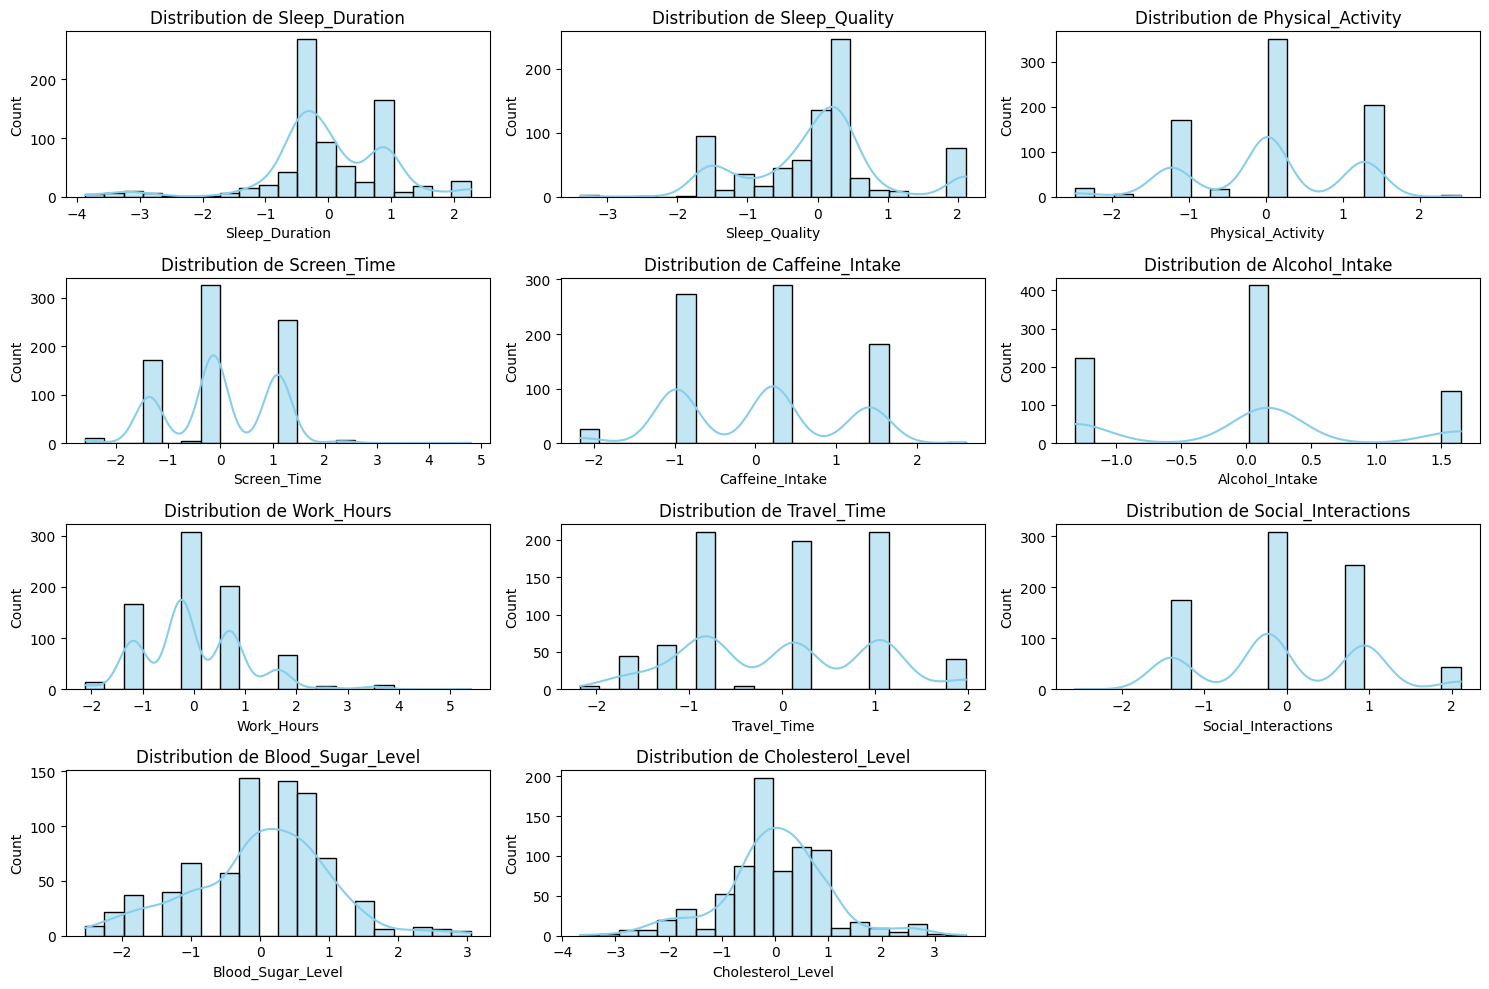

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Sleep_Duration', 'Sleep_Quality', 'Physical_Activity',
                'Screen_Time', 'Caffeine_Intake', 'Alcohol_Intake',
                'Work_Hours', 'Travel_Time', 'Social_Interactions',
                'Blood_Sugar_Level', 'Cholesterol_Level']

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4,3,i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()

In [ ]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder, StandardScaler


pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

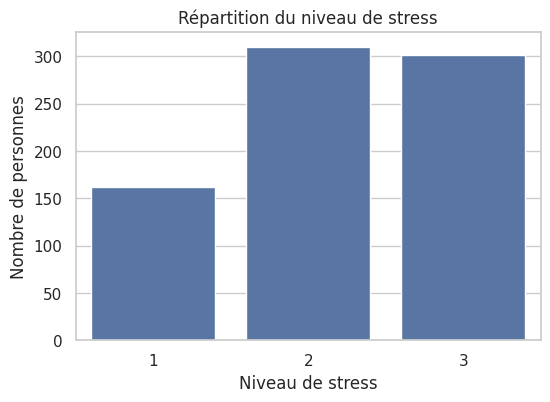

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Stress_Detection', data=df)
plt.title("Répartition du niveau de stress")
plt.xlabel("Niveau de stress")
plt.ylabel("Nombre de personnes")
plt.show()

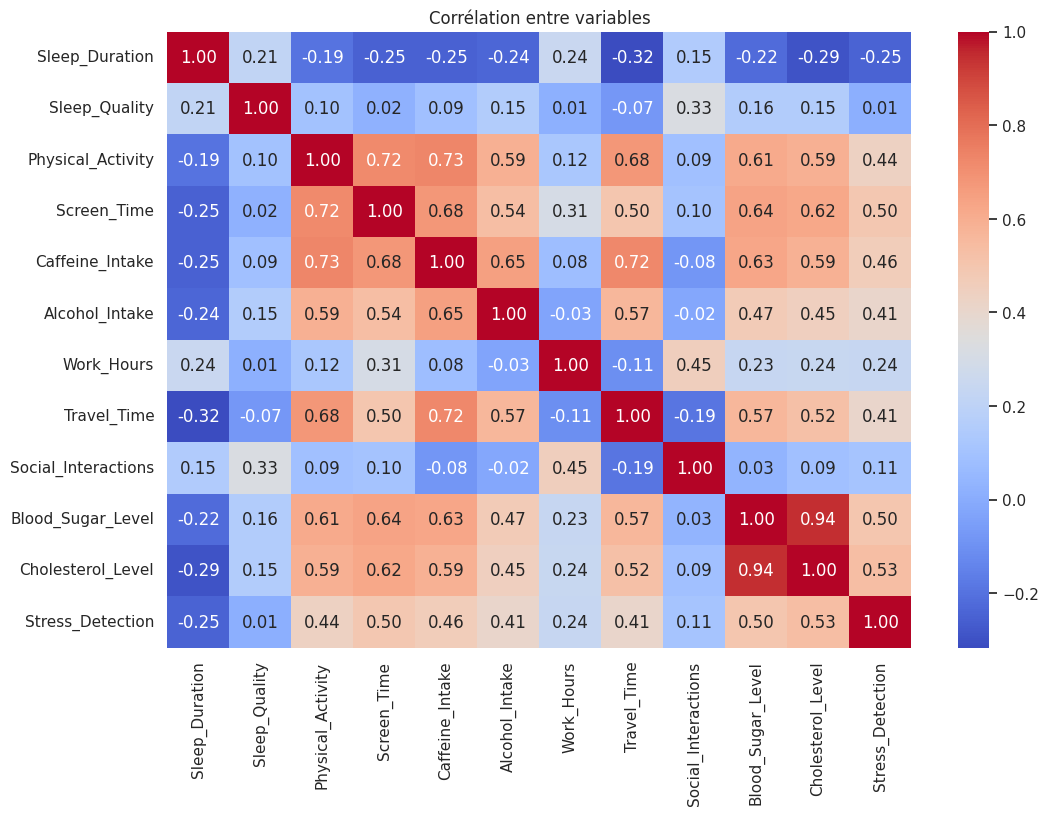

In [ ]:
plt.figure(figsize=(12,8))
corr = df[numeric_cols + ['Stress_Detection']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Corrélation entre variables')
plt.show()

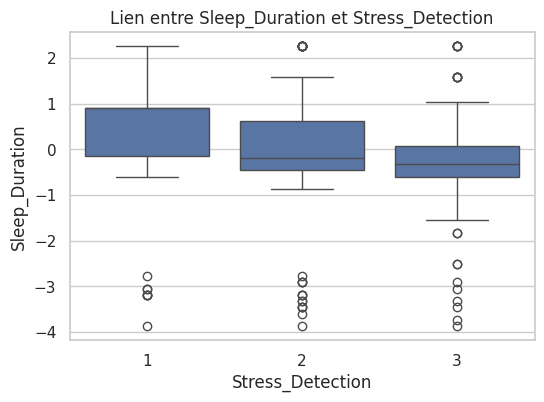

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Stress_Detection', y='Sleep_Duration', data=df)
plt.title("Lien entre Sleep_Duration et Stress_Detection")
plt.show()

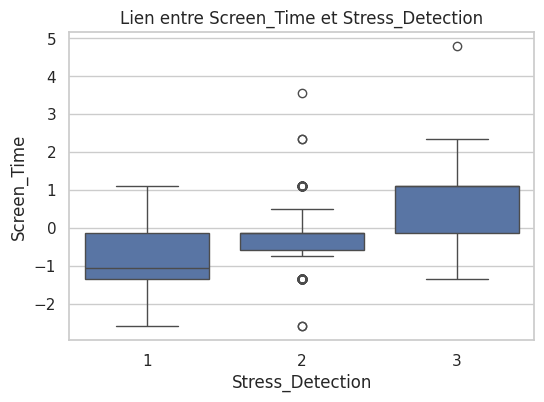

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Stress_Detection', y='Screen_Time', data=df)
plt.title("Lien entre Screen_Time et Stress_Detection")
plt.show()

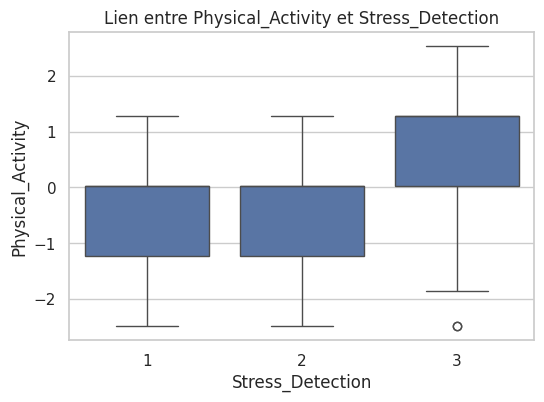

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Stress_Detection', y='Physical_Activity', data=df)
plt.title("Lien entre Physical_Activity et Stress_Detection")
plt.show()

Entraînement d’un modèle de prédiction de stress par régression logistique avec 1 000 itérations, et visualisation des métriques d’évaluation, de la matrice de confusion, de la courbe ROC et de la courbe d’apprentissage

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

X = df.drop('Stress_Detection', axis=1)


y = df['Stress_Detection']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000
)

model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

Accuracy: 0.6967741935483871
              precision    recall  f1-score   support

           1       0.79      0.45      0.58        33
           2       0.64      0.76      0.70        62
           3       0.73      0.77      0.75        60

    accuracy                           0.70       155
   macro avg       0.72      0.66      0.67       155
weighted avg       0.71      0.70      0.69       155



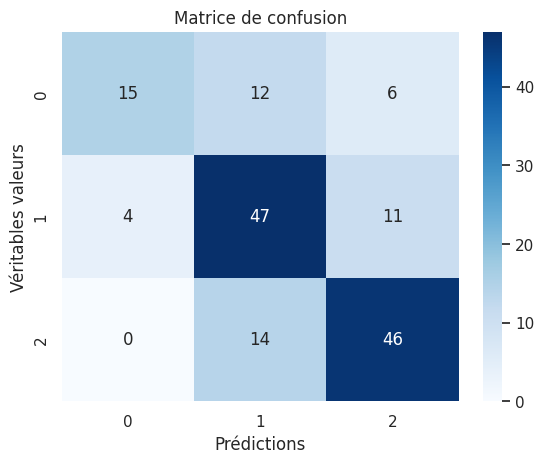

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Véritables valeurs')
plt.title('Matrice de confusion')
plt.show()

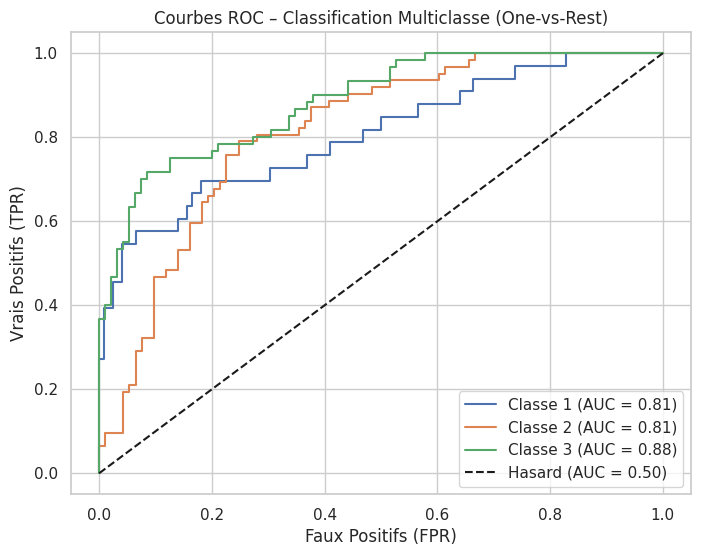

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np


classes = [1, 2, 3]
y_test_binarized = label_binarize(y_test, classes=classes)


y_score = model.predict_proba(X_test)


plt.figure(figsize=(8,6))

for i, class_id in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Classe {class_id} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Hasard (AUC = 0.50)')
plt.xlabel('Faux Positifs (FPR)')
plt.ylabel('Vrais Positifs (TPR)')
plt.title('Courbes ROC – Classification Multiclasse (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Top 15 des features les plus importantes :
Work_Hours                         0.415918
Cholesterol_Level                  0.343718
Alcohol_Intake                     0.290481
Exercise_Type_Pilates              0.253772
Exercise_Type_Strength Training    0.232052
Blood_Sugar_Level                  0.209426
Physical_Activity                  0.204590
Gender_Male                        0.202491
Gender_Female                      0.192447
Meditation_Practice_No             0.187337
Sleep_Quality                      0.181949
Marital_Status_Married             0.180381
Meditation_Practice_Yes            0.177293
Marital_Status_Single              0.176072
Exercise_Type_Cardio               0.167975
dtype: float64


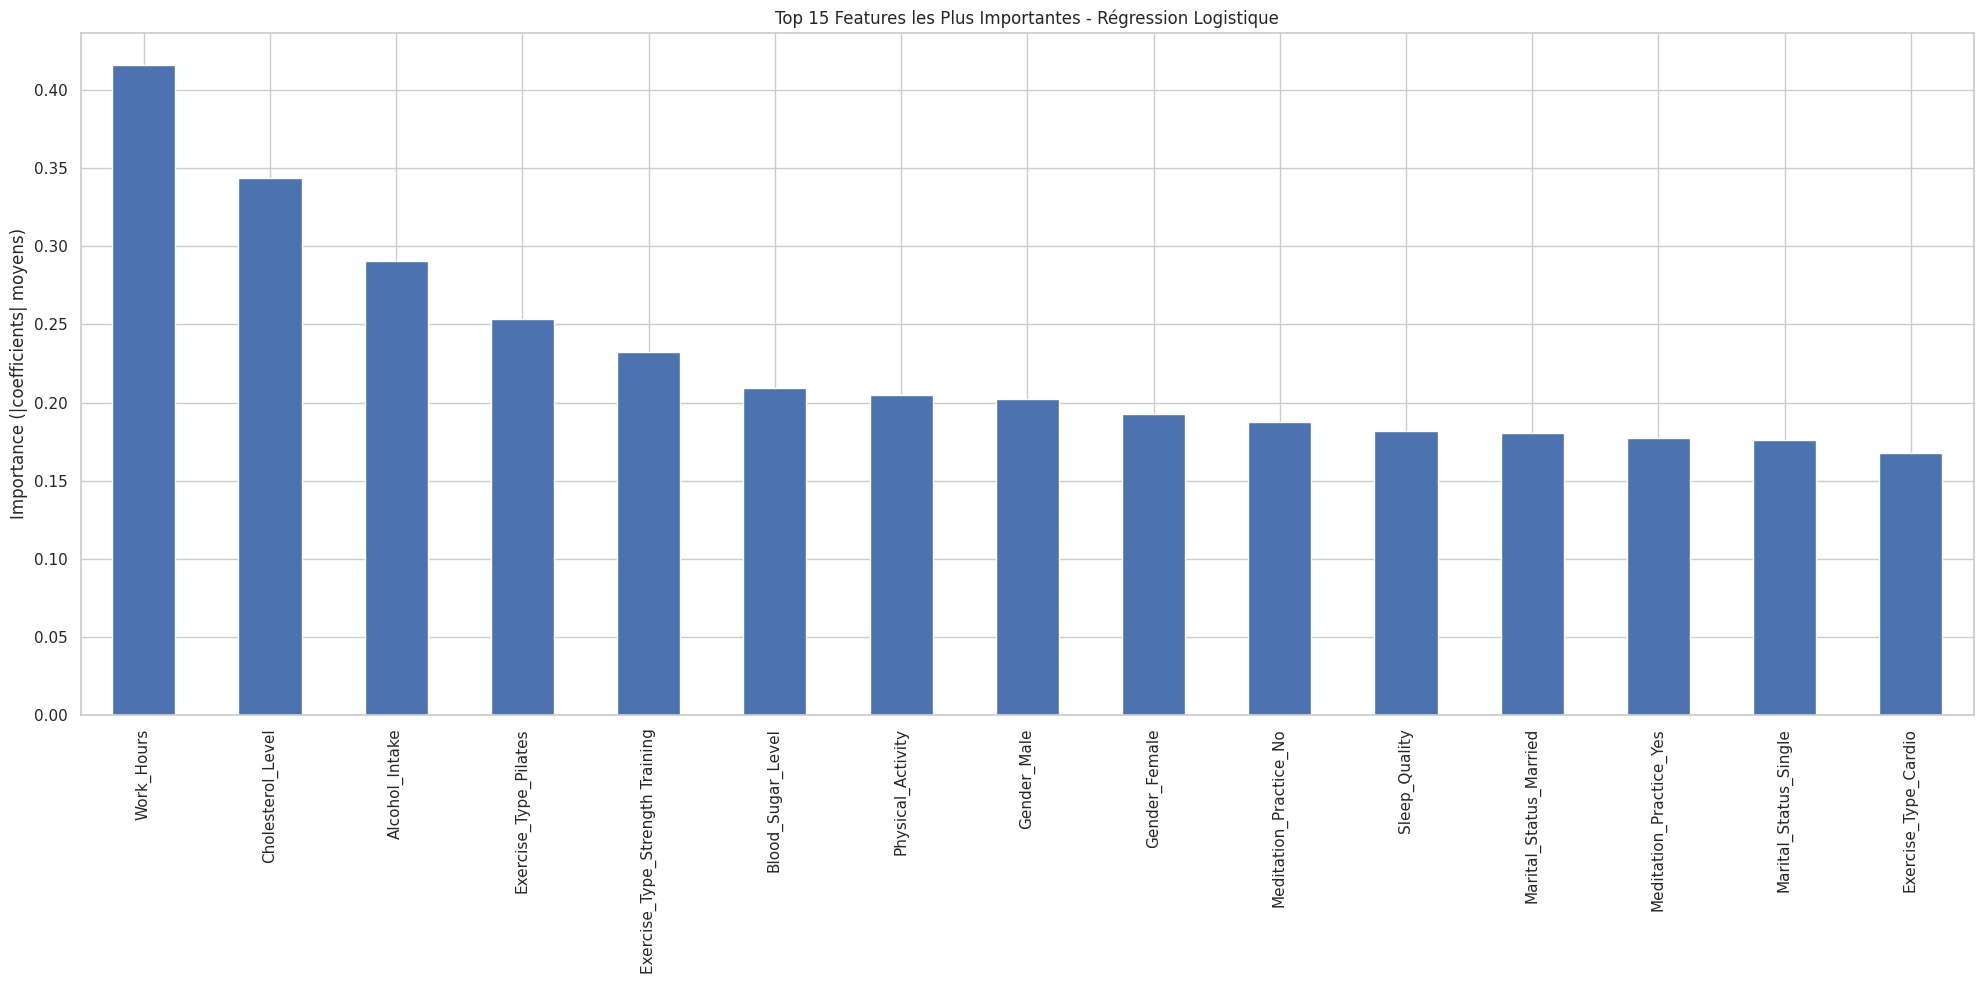

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


coef = model.coef_
features = X.columns


importance = pd.DataFrame(coef, columns=features).abs().mean()


top10 = importance.sort_values(ascending=False).head(15)

print("\nTop 15 des features les plus importantes :")
print(top10)


plt.figure(figsize=(20, 10))
top10.plot(kind='bar')
plt.title("Top 15 Features les Plus Importantes - Régression Logistique")
plt.ylabel("Importance (|coefficients| moyens)")
plt.tight_layout()
plt.show()

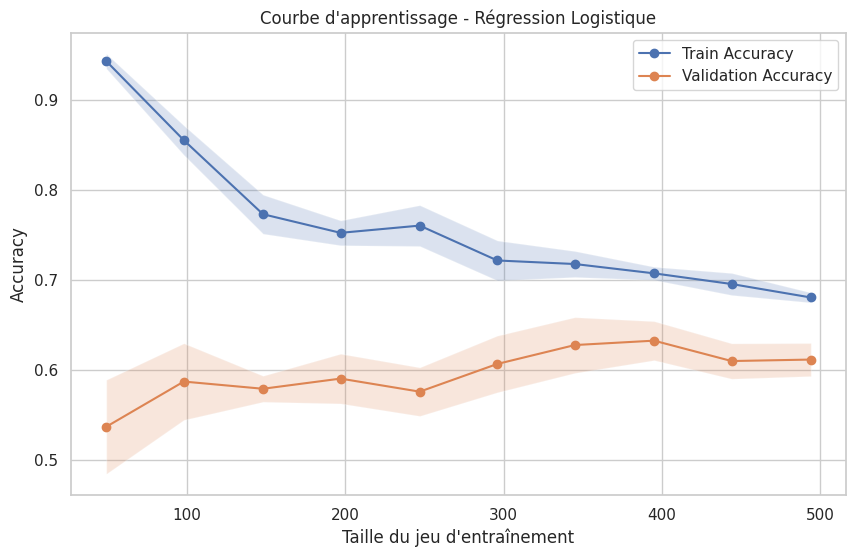

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np


train_sizes, train_scores, test_scores = learning_curve(
    model,
    X_train,
    y_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1
)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Train Accuracy", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Validation Accuracy", marker='o')


plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.2)

plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.2)

plt.title("Courbe d'apprentissage - Régression Logistique")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Entraînement d’un modèle de prédiction de stress par arbre de decison  avec 6 comme profondeur(max_depth), et visualisation des métriques d’évaluation, de la matrice de confusion et de la courbe d’apprentissage

Accuracy : 0.6516129032258065

Classification Report :
               precision    recall  f1-score   support

           1       0.58      0.42      0.49        33
           2       0.59      0.71      0.65        62
           3       0.75      0.72      0.74        60

    accuracy                           0.65       155
   macro avg       0.64      0.62      0.62       155
weighted avg       0.65      0.65      0.65       155



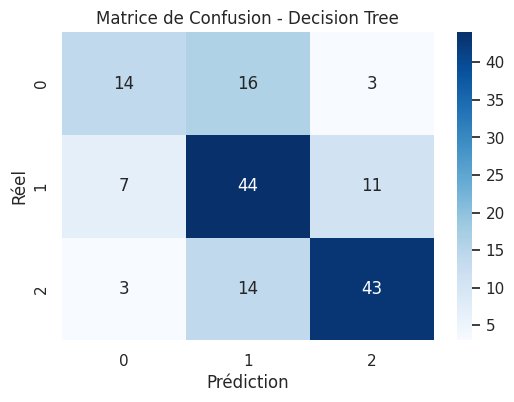

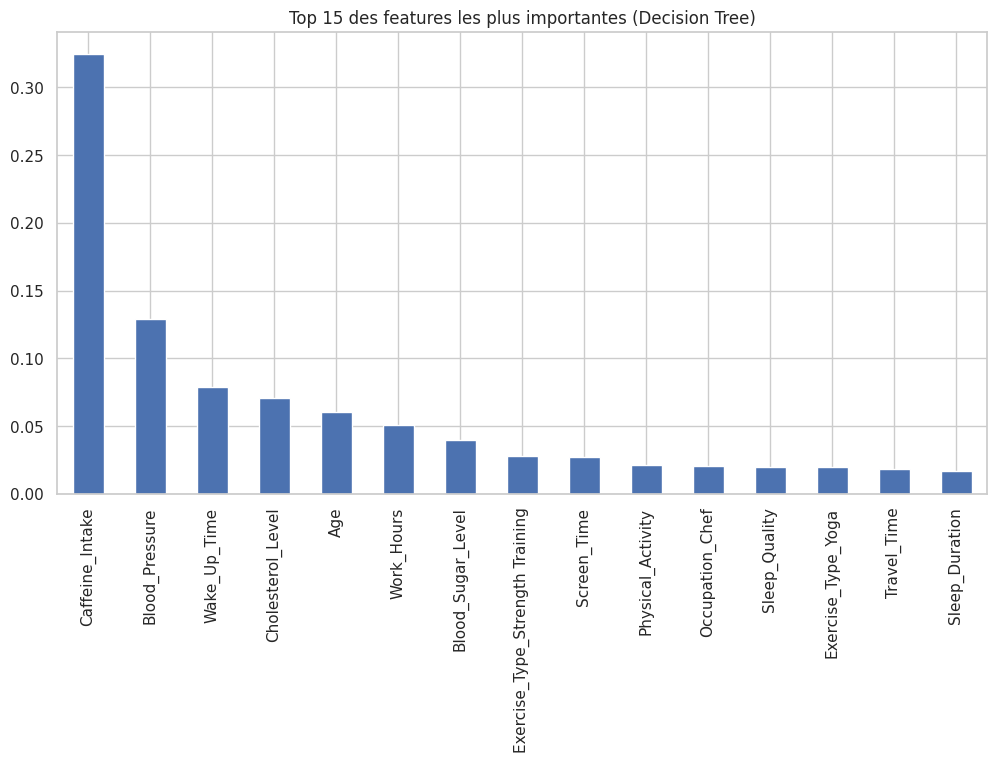


Features importantes :
 Caffeine_Intake                    0.324734
Blood_Pressure                     0.129289
Wake_Up_Time                       0.079220
Cholesterol_Level                  0.070695
Age                                0.060360
Work_Hours                         0.051181
Blood_Sugar_Level                  0.040034
Exercise_Type_Strength Training    0.028284
Screen_Time                        0.027139
Physical_Activity                  0.021398
Occupation_Chef                    0.020792
Sleep_Quality                      0.019577
Exercise_Type_Yoga                 0.019561
Travel_Time                        0.018505
Sleep_Duration                     0.016651
dtype: float64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt





model_dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    min_samples_split=2
)


model_dt.fit(X_train, y_train)


y_pred = model_dt.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))


plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de Confusion - Decision Tree")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()


importances = pd.Series(model_dt.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12,6))
importances.head(15).plot(kind='bar')
plt.title("Top 15 des features les plus importantes (Decision Tree)")
plt.show()

print("\nFeatures importantes :\n", importances.head(15))


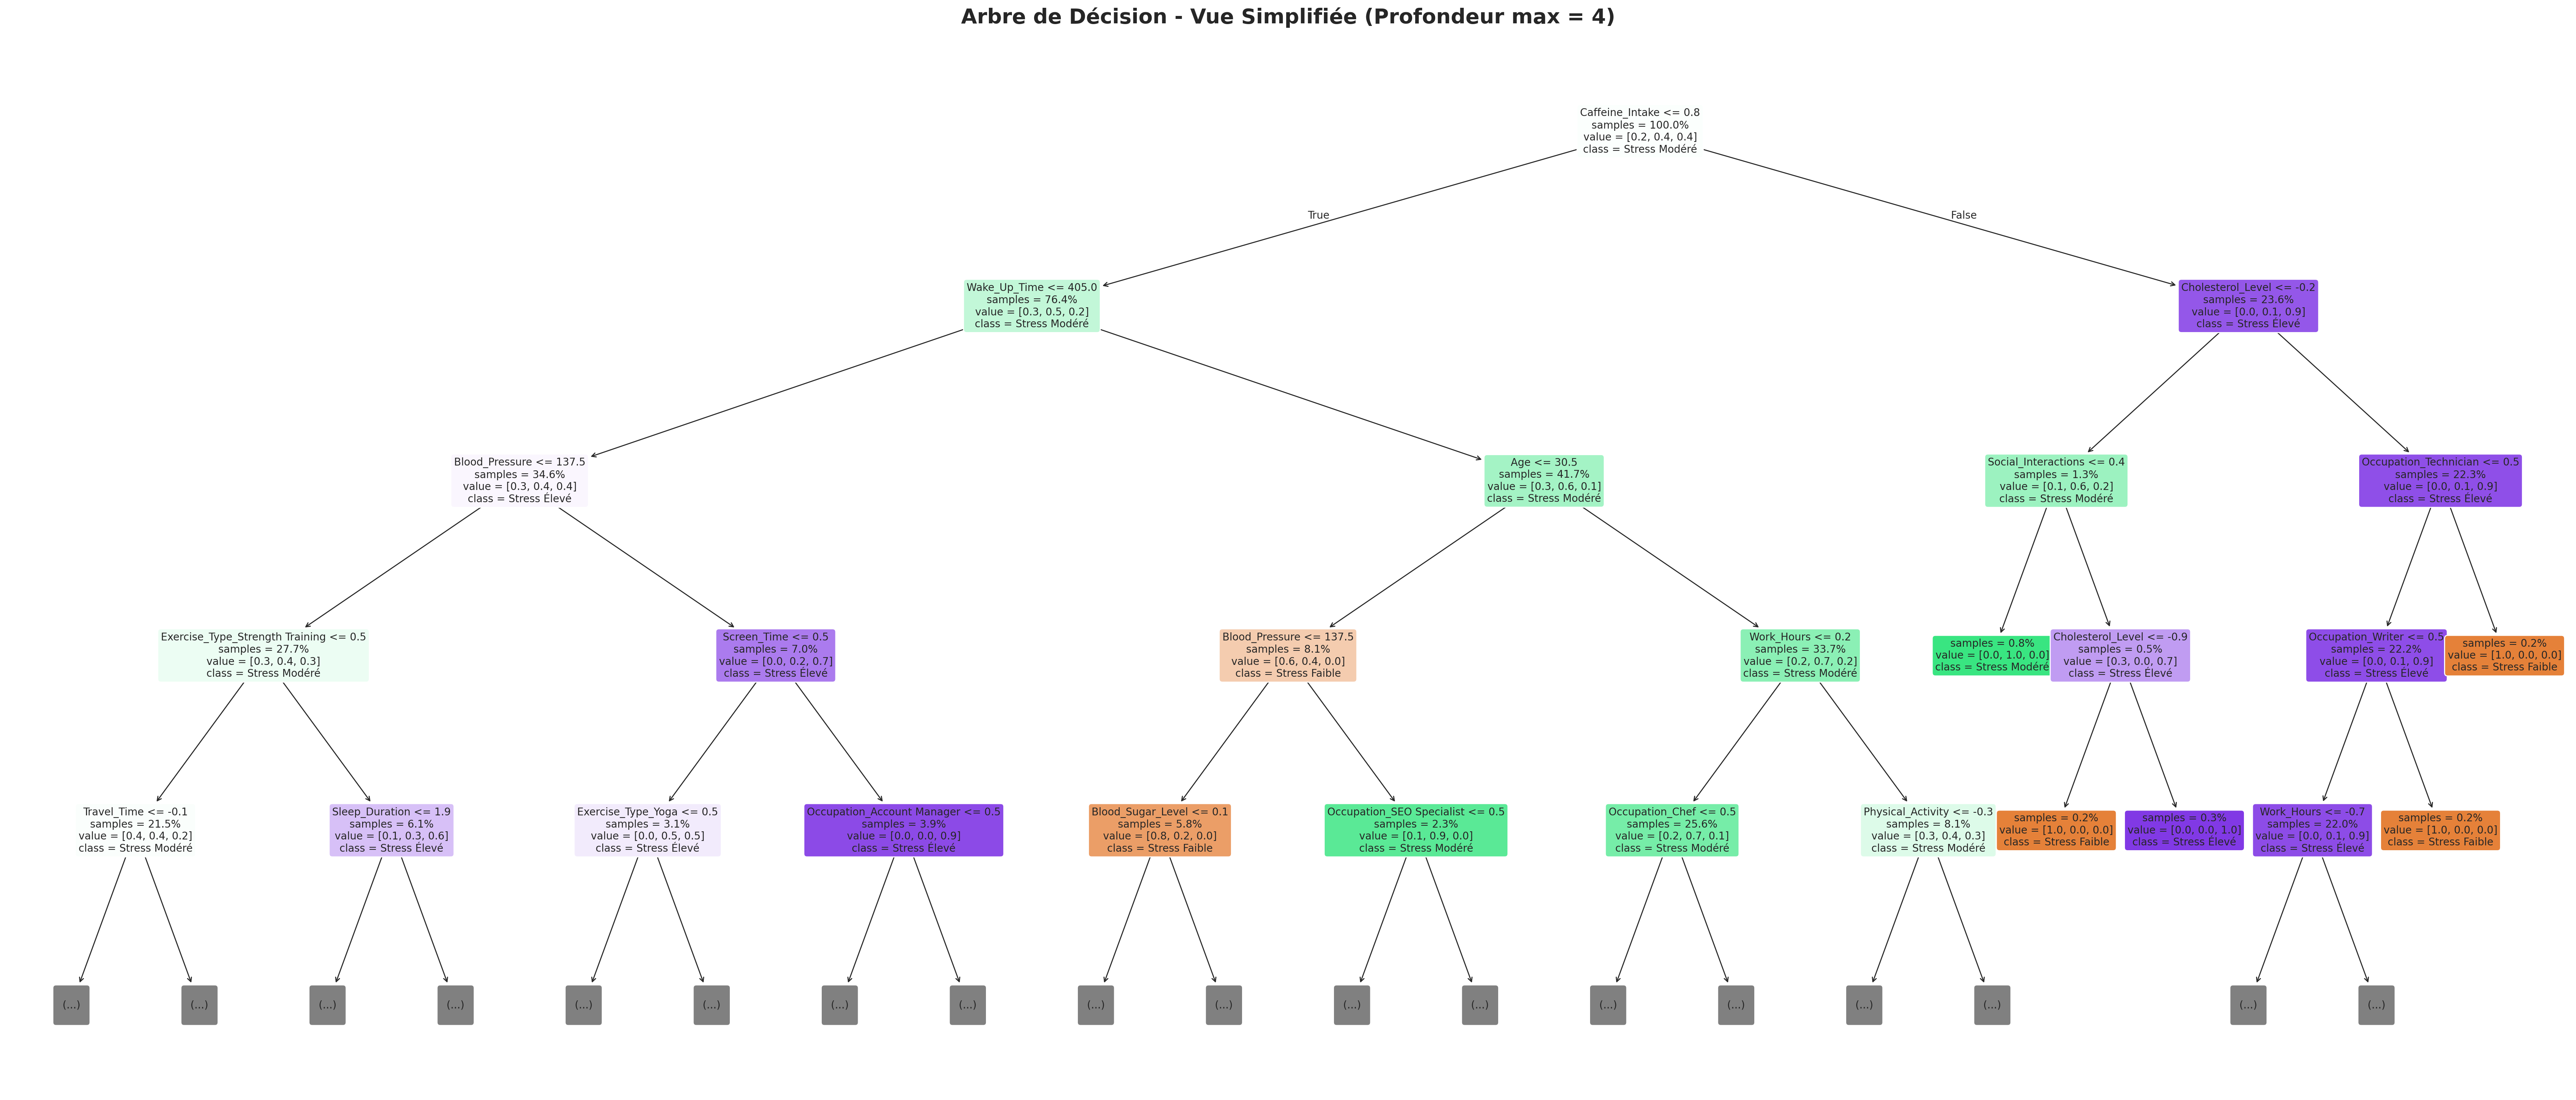

In [ ]:
def visualize_simplified_tree(model, feature_names, class_names, max_depth=4):
    """Crée une visualisation simplifiée et claire"""

    fig, ax = plt.subplots(figsize=(35, 15), dpi=200)

    # Style personnalisé
    tree.plot_tree(
        model,
        filled=True,
        feature_names=feature_names,
        max_depth=max_depth,
        fontsize=10,
        rounded=True,
        class_names=class_names,
        precision=1,
        ax=ax,
        impurity=False,  # Masquer l'impureté pour plus de clarté
        proportion=True,  # Afficher les proportions
    )

    plt.title(
        f"Arbre de Décision - Vue Simplifiée (Profondeur max = {max_depth})",
        fontsize=20,
        fontweight='bold',
        pad=20
    )

    # Améliorer l'apparence
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')

    plt.tight_layout()
    plt.savefig(f'tree_simplified_depth_{max_depth}.png',
                dpi=300,
                bbox_inches='tight',
                facecolor='white')
    plt.show()

# Utilisation
visualize_simplified_tree(
    model_dt,
    X.columns,
    ['Stress Faible', 'Stress Modéré', 'Stress Élevé'],
    max_depth=4
)

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, valid_scores = learning_curve(
    model_dt,
    X,
    y,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, valid_mean, label="Validation Accuracy")
plt.title("Courbe d'apprentissage - Decision Tree")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Les données sont normalisées, équilibrées avec SMOTE, puis réduites via PCA. Un GridSearchCV optimise automatiquement les paramètres du modèle KNN, qui est ensuite entraîné et évalué avec des métriques et une matrice de confusion.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)


pca = PCA(n_components=20, random_state=42)
X_train_pca = pca.fit_transform(X_train_res)
X_test_pca = pca.transform(X_test_scaled)


param_grid = {'n_neighbors': list(range(3, 31, 2)),  # k impair de 3 à 19
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_pca, y_train_res)



In [ ]:
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test_pca)

acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Low','Medium','High'],
            yticklabels=['Low','Medium','High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

X_vis = X_test_pca[:, :2]

df_vis = pd.DataFrame({
    'PC1': X_vis[:,0],
    'PC2': X_vis[:,1],
    'Classe_reelle': y_test,
    'Classe_predite': y_pred
})

colors = {1:'red', 2:'green', 3:'blue'}

plt.figure(figsize=(10,6))

for classe in y_test.unique():
    subset = df_vis[df_vis['Classe_reelle'] == classe]
    plt.scatter(subset['PC1'], subset['PC2'],
                c=colors[classe], label=f"Classe réelle {classe}", alpha=0.6)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisation des données après PCA (test set) colorées par classe réelle")
plt.legend()
plt.show()
plt.figure(figsize=(10,6))

for classe in y_test.unique():
    subset = df_vis[df_vis['Classe_predite'] == classe]
    plt.scatter(subset['PC1'], subset['PC2'],
                c=colors[classe], label=f"Classe prédite {classe}", alpha=0.6)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisation des données après PCA colorées par prédiction KNN")
plt.legend()
plt.show()
plt.figure(figsize=(10,6))

# Points correctement classés
correct = df_vis[df_vis['Classe_reelle'] == df_vis['Classe_predite']]
# Points mal classés
wrong = df_vis[df_vis['Classe_reelle'] != df_vis['Classe_predite']]

plt.scatter(correct['PC1'], correct['PC2'], c='green', label='Correct', alpha=0.6)
plt.scatter(wrong['PC1'], wrong['PC2'], c='red', label='Incorrect', alpha=0.6)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisation KNN : points corrects vs incorrects")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Courbe d'apprentissage pour le modèle KNN optimisé
train_sizes, train_scores, valid_scores = learning_curve(
    best_knn,                      # modèle KNN final
    X_train_pca, y_train_res,      # données d'entraînement (après SMOTE + PCA)
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Moyenne des scores
train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)

# Visualisation
plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, valid_mean, label="Validation Accuracy")
plt.title("Courbe d'apprentissage - KNN")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)


pca = PCA(n_components=30, random_state=42)
X_train_pca = pca.fit_transform(X_train_res)
X_test_pca = pca.transform(X_test_scaled)


param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

svm = SVC(class_weight='balanced', random_state=42)
grid = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_pca, y_train_res)

In [ ]:


print("Best parameters:", grid.best_params_)

# -----------------------------
# 8️⃣ Entraînement SVM final
# -----------------------------
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test_pca)

# -----------------------------
# 9️⃣ Évaluation
# -----------------------------
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low','Medium','High'],
            yticklabels=['Low','Medium','High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()


In [ ]:
X_vis = X_test_pca[:, :2]

df_vis = pd.DataFrame({
    'PC1': X_vis[:,0],
    'PC2': X_vis[:,1],
    'Classe_reelle': y_test,
    'Classe_predite': y_pred
})

colors = {1:'red', 2:'green', 3:'blue'}


plt.figure(figsize=(10,6))
for classe in y_test.unique():
    subset = df_vis[df_vis['Classe_reelle'] == classe]
    plt.scatter(subset['PC1'], subset['PC2'],
                c=colors[classe], label=f"Classe réelle {classe}", alpha=0.6)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisation des données après PCA colorées par classe réelle")
plt.legend()
plt.show()


plt.figure(figsize=(10,6))
for classe in y_test.unique():
    subset = df_vis[df_vis['Classe_predite'] == classe]
    plt.scatter(subset['PC1'], subset['PC2'],
                c=colors[classe], label=f"Classe prédite {classe}", alpha=0.6)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisation des données après PCA colorées par prédiction SVM")
plt.legend()
plt.show()


plt.figure(figsize=(10,6))
correct = df_vis[df_vis['Classe_reelle'] == df_vis['Classe_predite']]
wrong = df_vis[df_vis['Classe_reelle'] != df_vis['Classe_predite']]

plt.scatter(correct['PC1'], correct['PC2'], c='green', label='Correct', alpha=0.6)
plt.scatter(wrong['PC1'], wrong['PC2'], c='red', label='Incorrect', alpha=0.6)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisation SVM : points corrects vs incorrects")
plt.legend()
plt.show()


In [ ]:
# On ne prend que les 2 premières composantes
X_train_2d = X_train_pca[:, :2]
X_test_2d = X_test_pca[:, :2]

# Entraînement d'un SVM 2D
svm_2d = SVC(C=10, gamma='scale', kernel='rbf', class_weight='balanced', random_state=42)
svm_2d.fit(X_train_2d, y_train_res)

# Création d'une grille pour la visualisation
x_min, x_max = X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1
y_min, y_max = X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Prédiction sur la grille
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualisation
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.2, colors=['red','green','blue'])

colors = {1:'red', 2:'green', 3:'blue'}
for classe in np.unique(y_test):
    subset = X_test_2d[y_test==classe]
    plt.scatter(subset[:,0], subset[:,1], c=colors[classe], label=f"Classe réelle {classe}", edgecolor='k', alpha=0.6)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Frontière de décision SVM (2 premières composantes)")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import learning_curve

# SVM déjà entraîné (best_svm ou svm_2d)
svm_model = best_svm  # celui sur les 30 composantes

# Learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=svm_model,
    X=X_train_pca,
    y=y_train_res,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Moyennes et écarts-types
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Tracé
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o', linewidth=2.5, color='#2E86AB')
plt.plot(train_sizes, valid_mean, label="Validation Accuracy", marker='s', linewidth=2.5, color='#A23B72')

# Zones d'incertitude
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='#2E86AB')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.15, color='#A23B72')

# Personnalisation
plt.title("Courbe d'apprentissage - SVM", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Taille du jeu d'entraînement", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.legend(fontsize=11, loc='lower right')
plt.grid(True, alpha=0.3, linestyle='--')
plt.ylim([0.4, 1.05])
plt.tight_layout()
plt.show()


RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import RocCurveDisplay


df = pd.read_csv("stress_detection_data_encoded.csv")
df = df[[col for col in df.columns if not col.endswith("_original")]]

print(df.head())
print(df.dtypes)


In [ ]:
print(df.shape)
print(df.info())
print(df.isnull().sum())


In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr().iloc[:15,:15], annot=False, cmap="coolwarm")
plt.title("Heatmap (partielle) des corrélations")
plt.show()


In [ ]:
df[['Age','Sleep_Duration','Screen_Time','Work_Hours']].hist(figsize=(10,7), bins=20)
plt.tight_layout()
plt.show()


In [ ]:
to_drop = [col for col in df.columns if col.lower() == "stress_detection_num"]
df = df.drop(columns=to_drop, errors="ignore")

# Définir X et y
X = df.drop(columns=["Stress_Detection"])
y = df["Stress_Detection"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

model_rf.fit(X_train, y_train)


In [ ]:
y_pred = model_rf.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de Confusion - Random Forest")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()


In [ ]:
importances = model_rf.feature_importances_
indices = np.argsort(importances)[-15:]  # 15 plus importantes

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), X.columns[indices])
plt.title("Top 15 des Variables les Plus Importantes")
plt.xlabel("Importance")
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba = model_rf.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
print("AUC Score (OvR):", auc)


XGBOOST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import xgboost as xgb

sns.set()

In [ ]:
df = pd.read_csv("stress_detection_data_encoded.csv")
df = df[[c for c in df.columns if not c.endswith("_original")]]

df.head()


In [ ]:
drop_cols = ["stress_detection_num", "Stress_Detection_num"]
for col in drop_cols:
    if col in df.columns:
        df = df.drop(columns=[col])

# Target y
y = df["Stress_Detection"].copy()

# Features X : toutes les autres colonnes
X = df.drop(columns=["Stress_Detection"])

In [ ]:
print("y unique avant encodage :", np.unique(y)[:20])

# Si y est de type object (texte), on label-encode
if y.dtype == object or y.dtype == "O":
    le = LabelEncoder()
    y_enc = le.fit_transform(y)
    print("Mapping cible (LabelEncoder) :", dict(zip(le.classes_, le.transform(le.classes_))))
else:
    # si y est numérique mais commence à 1..k, on convertit en 0..k-1 pour sécurité
    uniques = np.unique(y)
    if set(uniques) == set([1,2,3]):
        y_enc = y.astype(int) - 1
        print("Target était 1,2,3 -> converti en 0,1,2.")
    else:
        # otherwise keep numeric as is but ensure ints from 0..k-1
        # if min > 0, relabel to 0-based
        if y.min() > 0:
            y_enc = y.astype(int) - y.min()
            print(f"Target numeric remappée en 0..k-1 (min original {y.min()}).")
        else:
            y_enc = y.astype(int).values

print("y_enc unique:", np.unique(y_enc))

In [ ]:
obj_cols = X.select_dtypes(include=['object','O']).columns.tolist()
print("Colonnes object dans X (à encoder si non vide) :", obj_cols[:30])

if len(obj_cols) > 0:
    X = pd.get_dummies(X, columns=obj_cols, drop_first=False)
    print("One-hot appliqué aux colonnes object. Nouvelle shape X:", X.shape)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)
print("Shapes :", X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [ ]:
xgb_model = xgb.XGBClassifier(
    objective="multi:softprob",
    num_class=len(np.unique(y_enc)),
    learning_rate=0.1,
    max_depth=6,
    n_estimators=250,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)

xgb_model.fit(X_train, y_train)

In [ ]:
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f"class_{i}" for i in np.unique(y_enc)],
            yticklabels=[f"class_{i}" for i in np.unique(y_enc)])
plt.xlabel("Prédite")
plt.ylabel("Réelle")
plt.title("Matrice de confusion - XGBoost")
plt.show()

In [ ]:
auc_ovr = roc_auc_score(y_test, y_proba, multi_class="ovr")
print("AUC (OvR) global:", auc_ovr)

# Tracer ROC One-vs-Rest par classe
plt.figure(figsize=(8,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Classe {cls} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--', alpha=0.6)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC multiclasses (One-vs-Rest) - XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
importances = xgb_model.feature_importances_
feat_names = X.columns
imp_df = pd.DataFrame({"feature": feat_names, "importance": importances})
imp_df = imp_df.sort_values("importance", ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=imp_df)
plt.title("Top 20 features - XGBoost")
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


data = {
    'Régression logistique': [0.6967, 0.72, 0.66, 0.67],
    'Arbre de décision': [0.6580, 0.65, 0.62, 0.63],
    'K-NN': [0.6065, 0.59, 0.59, 0.59],
    'SVM': [0.6968, 0.69, 0.69, 0.69],
    'Random Forest': [0.709, 0.71, 0.68, 0.69],
    'X-GBoost': [0.6903, 0.68, 0.67, 0.68]
}

df = pd.DataFrame(data, index=['Accuracy', 'Précision', 'Rappel', 'F1-Score'])

plt.figure(figsize=(12, 6))
sns.heatmap(df, annot=True, fmt='.4f', cmap='RdYlGn', center=0.65,
            linewidths=0.5, cbar_kws={'label': 'Score'})
plt.title('Heatmap des performances des modèles', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Modèles', fontsize=12)
plt.ylabel('Métriques', fontsize=12)
plt.tight_layout()
plt.savefig('heatmap_models.png', dpi=300, bbox_inches='tight')
plt.show()